<a href="https://colab.research.google.com/github/Ratnakar2022/Airbnb-data-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
#importing necessery libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#using pandas library and 'read_csv' function to read Airbnb csv file 
df_airbnb=pd.read_csv("/content/drive/My Drive/AlmaBetter/Capstone Project 1/Airbnb NYC 2019.csv")

In [5]:
#check top 10 record
df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [6]:
#checking total number of rows and columns in file that we are going to work 
df_airbnb.shape

(48895, 16)

In [7]:
#checking type of every column in the dataset
df_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
#let's check the information about the DataFrame.
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After loading the data we can see that  this data have 48895 rows and 16 columns by these we will go in to the deeper level for data exploration. As we can see that we have some NaN values which is require to cleaning and handling for the NaN values, so let's do some code for this.


# **Cleaning and Handling the missing Values**

In [9]:
# Let's find out the column name which have missing values
df_airbnb.isnull().sum()
# By the use of sum function we can get the total count of NaN values in each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As we can see above that only 4 column has null values. The "name" and "host_name" column have very less number of null values but the "last_review" and "reviews_per_month"  have the huge amount of null values.Looking into the nature of data we can say that we can easily handle these null values by dropping the "last_review" and "name" columns but i want to have all the columns for our dataset and putting some values in them, so let's handle these null values.


# **Let's Handle The Missing Values**

In [13]:
# Replacing all NaN value in "last_review" and "reviews_per_month"  with '0'.
df_airbnb.fillna({'reviews_per_month':0,'last_review':0},inplace=True)
# Replacing all NaN value in "name" and "host_name"  with 'missing values'.
df_airbnb.fillna({'name':"missing values",'host_name':"missing values"},inplace=True)
#verify for the changes
df_airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now we have handled the missing values for those columns as can see that above, now all have 0 null values.

# **Exploratory Data Analysis And Visualization**




Now we have all our data clean and we are ready for exploration of data. Just want to mention here, i will explore the data in incremenatal order like i will go from column 1, column 2 and so on. By this we will get to know about columns relation with other columns so that we can make some useful insights about data.

In [17]:
#we will use first column 'name' later for now will start from host_id
# let's first check the unique value counts of the host_id column
df_airbnb.host_id.value_counts().head(5)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [19]:
# We have one column in our data that is 'calculated_host_listings_count'.
#this one has the total number of host listed in data,by these we can also confirm about above host is count
df_airbnb.calculated_host_listings_count.max()

327

In [28]:
top_host_id=df_airbnb.host_id.value_counts().head(5)
calculated_host=df_airbnb.calculated_host_listings_count.max()

# We need to create a Data frame for these series
top_host_id1=pd.DataFrame(top_host_id)
top_host_id1.reset_index(inplace=True)
top_host_id1.rename(columns={'index':'Host_ID', 'host_id':'Total_Count'}, inplace=True)
top_host_id1


,Host_ID,Total_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


Text(0.5, 0, 'Host IDs')

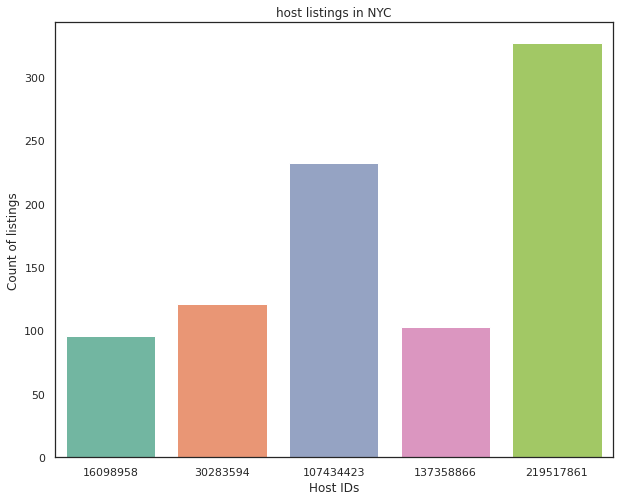

In [41]:
# let's create some visulization on these above data
# figure size for  visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

fig1=sns.barplot(x="Host_ID", y="Total_Count", data=top_host_id1,
                 palette='Set2')
fig1.set_title('host listings in NYC')
fig1.set_ylabel('Count of listings')
fig1.set_xlabel('Host IDs')
